In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("preprocessed_data.csv")
dataset

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,New York,ABC Corp,35,M,0
1,2,500.0,Chicago,XYZ Inc,45,F,0
2,3,2000.0,Los Angeles,ABC Corp,28,M,1
3,4,1500.0,San Francisco,XYZ Inc,30,F,0
4,5,800.0,Chicago,ABC Corp,50,F,0
...,...,...,...,...,...,...,...
81,82,1500.0,Los Angeles,XYZ Inc,31,M,0
82,83,2800.0,San Francisco,ABC Corp,50,F,1
83,84,1350.0,Chicago,XYZ Inc,28,M,0
84,85,920.0,New York,ABC Corp,47,F,0


In [3]:
dataset.isnull().sum()

transaction_id        0
transaction_amount    0
location              0
merchant              0
age                   0
gender                0
fraud_label           0
dtype: int64

In [4]:
dataset.cov()

,transaction_id,transaction_amount,age,fraud_label
transaction_id,623.500000,958.500000,1.994118,-0.729412
transaction_amount,958.500000,638714.271546,-681.576607,241.471956
age,1.994118,-681.576607,77.958003,-0.074145
fraud_label,-0.729412,241.471956,-0.074145,0.153215


In [5]:
dataset.corr()

,transaction_id,transaction_amount,age,fraud_label
transaction_id,1.000000,0.048031,0.009045,-0.074628
transaction_amount,0.048031,1.000000,-0.096590,0.771904
age,0.009045,-0.096590,1.000000,-0.021454
fraud_label,-0.074628,0.771904,-0.021454,1.000000


In [8]:
#!pip install seaborn

In [9]:
import seaborn as sns

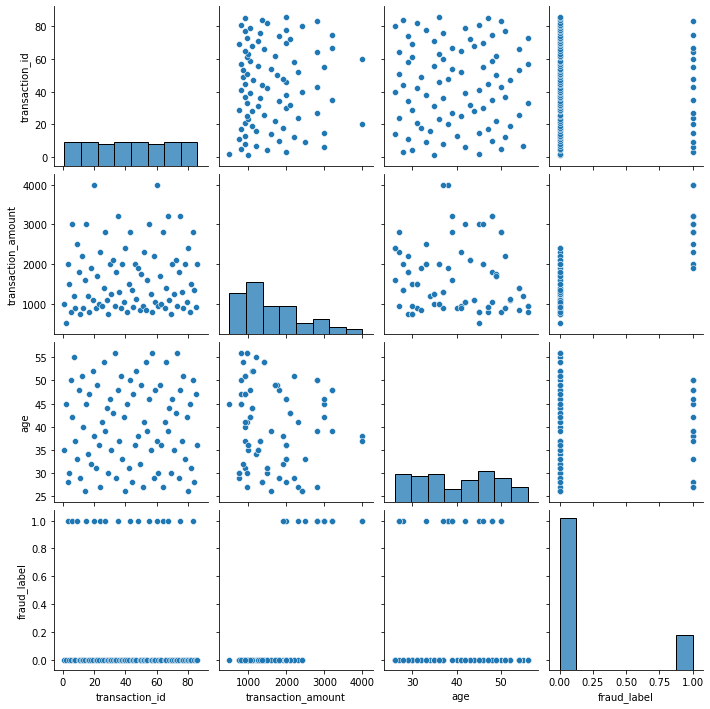

In [10]:
sns.pairplot(dataset)

In [14]:
#!pip install statsmodels

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [13]:
calc_vif(dataset[["age","fraud_label"]])

,variables,VIF
0,age,1.210741
1,fraud_label,1.210741


In [15]:
dataset[dataset["gender"]=="M"]

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,New York,ABC Corp,35,M,0
2,3,2000.0,Los Angeles,ABC Corp,28,M,1
5,6,3000.0,New York,XYZ Inc,42,M,1
7,8,900.0,Los Angeles,XYZ Inc,37,M,0
9,10,1800.0,New York,XYZ Inc,48,M,0
11,12,2200.0,Chicago,XYZ Inc,51,M,0
13,14,1600.0,Los Angeles,XYZ Inc,26,M,0
15,16,1200.0,Chicago,XYZ Inc,34,M,0
17,18,1900.0,Los Angeles,XYZ Inc,32,M,0
19,20,4000.0,Chicago,XYZ Inc,38,M,1


# Independant Sample- Unpaired T Test¶
Diferrent Group but same contion

In [16]:
from scipy.stats import ttest_ind
#drop null values
dataset=dataset.dropna()
male=dataset[dataset["gender"]=="M"]["fraud_label"]
female=dataset[dataset["gender"]=="F"]["fraud_label"]
#print(male)
ttest_ind(male,female)

Ttest_indResult(statistic=-0.5487032611687344, pvalue=0.584664625161475)

# Dependant Sample-Paired T_Test
Same Group but Different Condition

In [17]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['fraud_label']
male1 = dataset[dataset['gender']=='M']['transaction_amount']
ttest_rel(male, male1)

Ttest_relResult(statistic=-18.64809014030922, pvalue=6.20872491662734e-22)

In [18]:
import scipy.stats as stats
stats.f_oneway(dataset["transaction_amount"],dataset["fraud_label"],dataset["age"])

F_onewayResult(statistic=346.2326747083049, pvalue=2.0991702822680702e-73)

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Two-way ANOVA
ano=ols("transaction_amount~fraud_label+age",data=dataset).fit()
two=sm.stats.anova_lm(ano,type=2)

In [20]:
two

,df,sum_sq,mean_sq,F,PR(>F)
fraud_label,1.0,3.234832e+07,3.234832e+07,124.332950,3.538272e-18
age,1.0,3.478778e+05,3.478778e+05,1.337092,2.508649e-01
Residual,83.0,2.159452e+07,2.601749e+05,NaN,NaN
